## **Import Library**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer

# **Data Preparation**

## **Load Dataset**

In [2]:
filepath1 = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Dataset/sample_submission.csv'
filepath2 = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Dataset/test.csv'
filepath3 = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Dataset/train.csv'

In [3]:
df1 = pd.read_csv(filepath1)
df2 = pd.read_csv(filepath2)
df3 = pd.read_csv(filepath3)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df1.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [8]:
df2.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
df3.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **Gabungkan Dataset Sample dan Test**

Hal ini karena dataset sample berisi kolom SalePrice milik data test.

In [10]:
def copy_column_by_id(source_df, destination_df, id_column, column_to_copy):
    # Gabungkan DataFrame destinasi dengan DataFrame sumber berdasarkan kolom ID
    merged_df = pd.merge(destination_df, source_df[[id_column, column_to_copy]], on=id_column, how='left', suffixes=('', '_source'))
    
    # Atur nama kolom yang disalin
    merged_df.rename(columns={column_to_copy+'_source': column_to_copy}, inplace=True)
    
    return merged_df

In [11]:
# Panggil fungsi untuk menyalin kolom SalePrice
df4 = copy_column_by_id(df1, df2, 'Id', 'SalePrice')

In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
df4.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


## **Merge df4 dengan Dataset Train**

Hal ini diperlukan untuk mendapatkan dataset yang utuh dan berurutan.

In [14]:
def merge_same_columns(df1, df2):
    # Gabungkan DataFrames berdasarkan kolom dengan nama yang sama
    merged_df = pd.concat([df1, df2], ignore_index=True)
    
    return merged_df

In [15]:
# Hasil gabungan dan pengurutan DataFrame
df_5 = merge_same_columns(df3, df4)

In [16]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [17]:
df_5.sort_values(by='Id', ascending=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


In [18]:
df_5.sort_values(by='Utilities', ascending=True, na_position='first')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1915,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,173575.505287
1945,1946,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,NaN,...,0,NaN,NaN,Shed,750,5,2008,WD,Normal,221813.009482
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
1940,1941,60,RL,73.0,11184,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Family,181276.500572
1941,1942,60,RL,NaN,14067,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,9,2008,WD,Normal,192474.817899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,975,70,RL,60.0,11414,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,10,2009,WD,Normal,167500.000000
975,976,160,FV,NaN,2651,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,165000.000000
976,977,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500.000000
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,187741.866657


## **Mencari missing value dan mengatasi masalah missing value jika ada.**

### **Menemukan Missing Value**

In [19]:
def display_null_columns(df):
    # Deteksi nilai null dalam DataFrame
    null_values = df.isnull()

    # Hitung jumlah nilai null dalam setiap kolom
    null_count = null_values.sum()

    # Filter kolom yang memiliki nilai null
    null_columns = null_count[null_count > 0]

    # Tampilkan kolom yang memiliki nilai null, jumlah nullnya, dan tipe data kolomnya
    if not null_columns.empty:
        print("Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:")
        null_info = pd.concat([null_columns, df[null_columns.index].dtypes], axis=1)
        null_info.columns = ['Jumlah Null', 'Tipe Data']
        print(null_info)
    else:
        print("Tidak ada nilai null dalam DataFrame.")

In [20]:
display_null_columns(df_5)

Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:
              Jumlah Null Tipe Data
MSZoning                4    object
LotFrontage           486   float64
Alley                2721    object
Utilities               2    object
Exterior1st             1    object
Exterior2nd             1    object
MasVnrType           1766    object
MasVnrArea             23   float64
BsmtQual               81    object
BsmtCond               82    object
BsmtExposure           82    object
BsmtFinType1           79    object
BsmtFinSF1              1   float64
BsmtFinType2           80    object
BsmtFinSF2              1   float64
BsmtUnfSF               1   float64
TotalBsmtSF             1   float64
Electrical              1    object
BsmtFullBath            2   float64
BsmtHalfBath            2   float64
KitchenQual             1    object
Functional              2    object
FireplaceQu          1420    object
GarageType            157    object
GarageYrBlt           159   flo

### **Memperbaiki Mising Value pada data String**

#### Data yang memang memiliki kategori nilai **None** atau **NA**.

1. Alley
2. MasVnrType
3. BsmtQual
4. BsmtCond
5. BsmtExposure
6. BsmtFinType1
7. BsmtFinType2
8. FireplaceQu
9. GarageType
10. GarageFinish
11. GarageQual
12. GarageCond
13. PoolQC
14. Fence
15. MiscFeature

#### Data yang tidak memiliki kategori nilai **None** atau **NA**.


1. MSZoning
2. Utilities
3. Exterior1st
4. Exterior2nd
5. Electrical
6. KitchenQual
7. Functional
8. SaleType

#### Mengubah nilai **None** atau **NA** menjadi **Without**.

In [21]:
def replace_na_with_without(df, columns_to_update):
    for col in columns_to_update:
        df[col] = df[col].fillna('Without')
    return df

In [22]:
columns_to_update = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
    'MiscFeature'
]

# Panggil fungsi untuk mengubah nilai NA/None menjadi 'Without'
df_modified = replace_na_with_without(df_5, columns_to_update)

In [23]:
display_null_columns(df_modified)

Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:
              Jumlah Null Tipe Data
MSZoning                4    object
LotFrontage           486   float64
Utilities               2    object
Exterior1st             1    object
Exterior2nd             1    object
MasVnrArea             23   float64
BsmtFinSF1              1   float64
BsmtFinSF2              1   float64
BsmtUnfSF               1   float64
TotalBsmtSF             1   float64
Electrical              1    object
BsmtFullBath            2   float64
BsmtHalfBath            2   float64
KitchenQual             1    object
Functional              2    object
GarageYrBlt           159   float64
GarageCars              1   float64
GarageArea              1   float64
SaleType                1    object


#### Memperbaiki Missing Value pada data String tanpa kategorikal **NA/None** menggunkana **modus**

In [24]:
def fill_na_with_mode(df, columns_to_fill):
    for col in columns_to_fill:
        mode_value = df[col].mode()[0] 
        df[col] = df[col].fillna(mode_value)
    return df

In [25]:
# Daftar kolom yang ingin diisi nilai NaN dengan modusnya
columns_to_fill = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']

# Panggil fungsi untuk mengisi nilai NaN dengan modus untuk setiap kolom yang ditentukan
df_filled = fill_na_with_mode(df_modified, columns_to_fill)

In [26]:
display_null_columns(df_filled)

Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:
              Jumlah Null Tipe Data
LotFrontage           486   float64
MasVnrArea             23   float64
BsmtFinSF1              1   float64
BsmtFinSF2              1   float64
BsmtUnfSF               1   float64
TotalBsmtSF             1   float64
BsmtFullBath            2   float64
BsmtHalfBath            2   float64
GarageYrBlt           159   float64
GarageCars              1   float64
GarageArea              1   float64


### **Memperbaiki Mising Value pada data Float**

#### Mengisi menggunakan **mean**. 

In [27]:
def fill_null_with_mean(df, columns_with_null):
    for col in columns_with_null:
        df[col] = df[col].fillna(df[col].mean())
    return df

In [28]:
# Daftar kolom yang ingin diisi nilai NaN dengan meannya
columns_with_null = [
    'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
    'GarageCars', 'GarageArea'
]
# Panggil fungsi untuk mengisi nilai NaN dengan modus untuk setiap kolom yang ditentukan
df_missing_fixed = fill_null_with_mean(df_filled, columns_with_null)

In [29]:
display_null_columns(df_missing_fixed)

Tidak ada nilai null dalam DataFrame.


## **Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.**

### **Menemukan duplicate value**

In [30]:
def check_duplicate_ids(df):
    # Periksa apakah ada data yang duplikat
    duplicate_all= df.duplicated()
    
    # Filter data yang memiliki duplikat
    duplicate_rows = df[duplicate_all]
    
    # Tampilkan hasil
    if not duplicate_rows.empty:
        print("Ada Data yang duplikat:")
        print(duplicate_rows)
    else:
        print("Tidak ada Data duplikat dalam DataFrame.")

In [31]:
check_duplicate_ids(df_missing_fixed)

Tidak ada Data duplikat dalam DataFrame.


Duplikasi data tidak ditemukan dalam dataset. Maka tidak perlu dilakukan tindakan apapun.

In [32]:
df_missing_fixed.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Without,Reg,Lvl,AllPub,...,0,Without,Without,Without,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Without,Reg,Lvl,AllPub,...,0,Without,Without,Without,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,Without,IR1,Lvl,AllPub,...,0,Without,Without,Without,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,Without,IR1,Lvl,AllPub,...,0,Without,Without,Without,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,Without,IR1,Lvl,AllPub,...,0,Without,Without,Without,0,12,2008,WD,Normal,250000.0


## **Memeriksa outlier dan menangani outlier jika ada.**

### **Menemukan Outlier**

#### Boxplot

In [33]:
def plot_boxplot(df, figsize=(12, 36)):
    numeric_columns = df.select_dtypes(include='number').columns
    num_plots = len(numeric_columns)
    num_cols = 4  # Angka kolom untuk tata letak subplot, Anda bisa mengubahnya sesuai kebutuhan

    # Hitung jumlah baris yang diperlukan berdasarkan jumlah kolom yang diinginkan
    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Loop melalui setiap kolom numerik dan buat boxplot di subplot yang sesuai
    for i, column in enumerate(numeric_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        df.boxplot(column=[column], ax=ax)
        ax.set_title(f'Boxplot {column}')

    # Hapus subplot yang tidak digunakan
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()


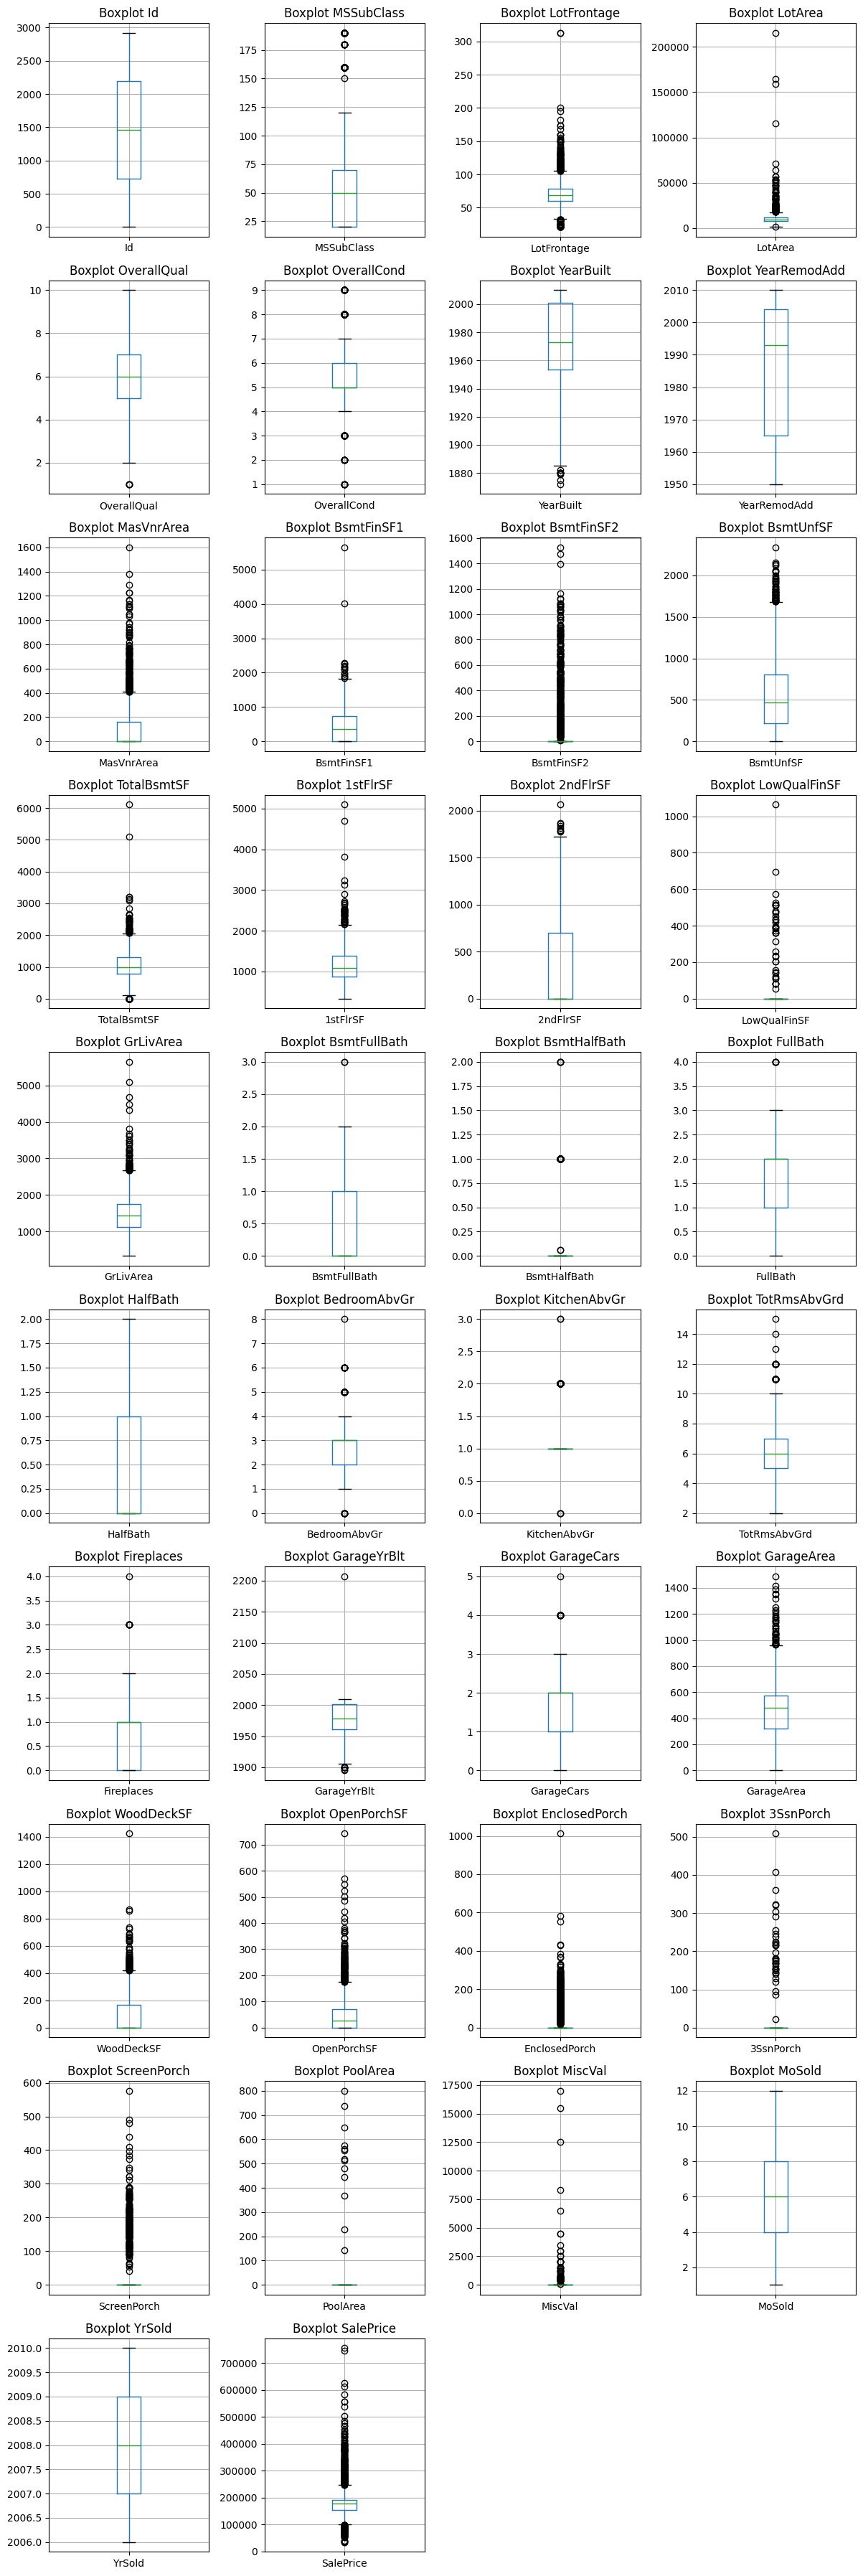

In [48]:
plot_boxplot(df_missing_fixed)

In [35]:
def detect_outliers_columns(df):
    outliers_columns = []  # List untuk menyimpan nama kolom yang mengandung outlier
    
    # Iterasi melalui setiap kolom numerik
    for column_name in df.select_dtypes(include='number').columns:
        # Menghitung kuartil ke-1 dan kuartil ke-3
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        
        # Menghitung rentang interkuartil (IQR)
        iqr = q3 - q1
        
        # Menentukan batas atas dan batas bawah untuk outlier
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Mendeteksi apakah ada outlier dalam kolom saat ini
        if (df[column_name] < lower_bound).any() or (df[column_name] > upper_bound).any():
            outliers_columns.append(column_name)
    
    return outliers_columns

In [36]:
# Mendeteksi kolom dengan outlier dalam DataFrame
kolom_outlier = detect_outliers_columns(df_missing_fixed)

jumlah_kolom_outlier = len(kolom_outlier)

print("Kolom dengan outlier:")
print(kolom_outlier)
print("Jumlah kolom dengan outlier:", jumlah_kolom_outlier)

Kolom dengan outlier:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
Jumlah kolom dengan outlier: 33


### **Mengatasi Outlier**

#### Transformasi Kuadrat

In [119]:
def transform_outliers(df):
    # Salin DataFrame untuk mencegah perubahan pada data asli
    df_copy = df.copy()
    
    # Mendapatkan kolom-kolom yang bertipe numerik
    numeric_columns = df_copy.select_dtypes(include='number').columns
    
    # Melakukan transformasi akar kuadrat hanya pada kolom yang masih memiliki outlier
    for column in numeric_columns:
        # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)
        
        # Menghitung jarak interkuartil (IQR)
        iqr = q3 - q1
        
        # Menentukan batas atas dan batas bawah untuk outlier
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Jika ada outlier, lakukan transformasi akar kuadrat
        if (df_copy[column] < lower_bound).any() or (df_copy[column] > upper_bound).any():
            # Melakukan transformasi akar kuadrat pada nilai yang lebih besar dari batas atas (upper_bound)
            df_copy[column] = np.where(df_copy[column] > upper_bound, np.sqrt(df_copy[column]), df_copy[column])
        
    return df_copy

In [120]:
# Memanggil fungsi untuk melakukan transformasi
df_outlier_clean = transform_outliers(df_missing_fixed)

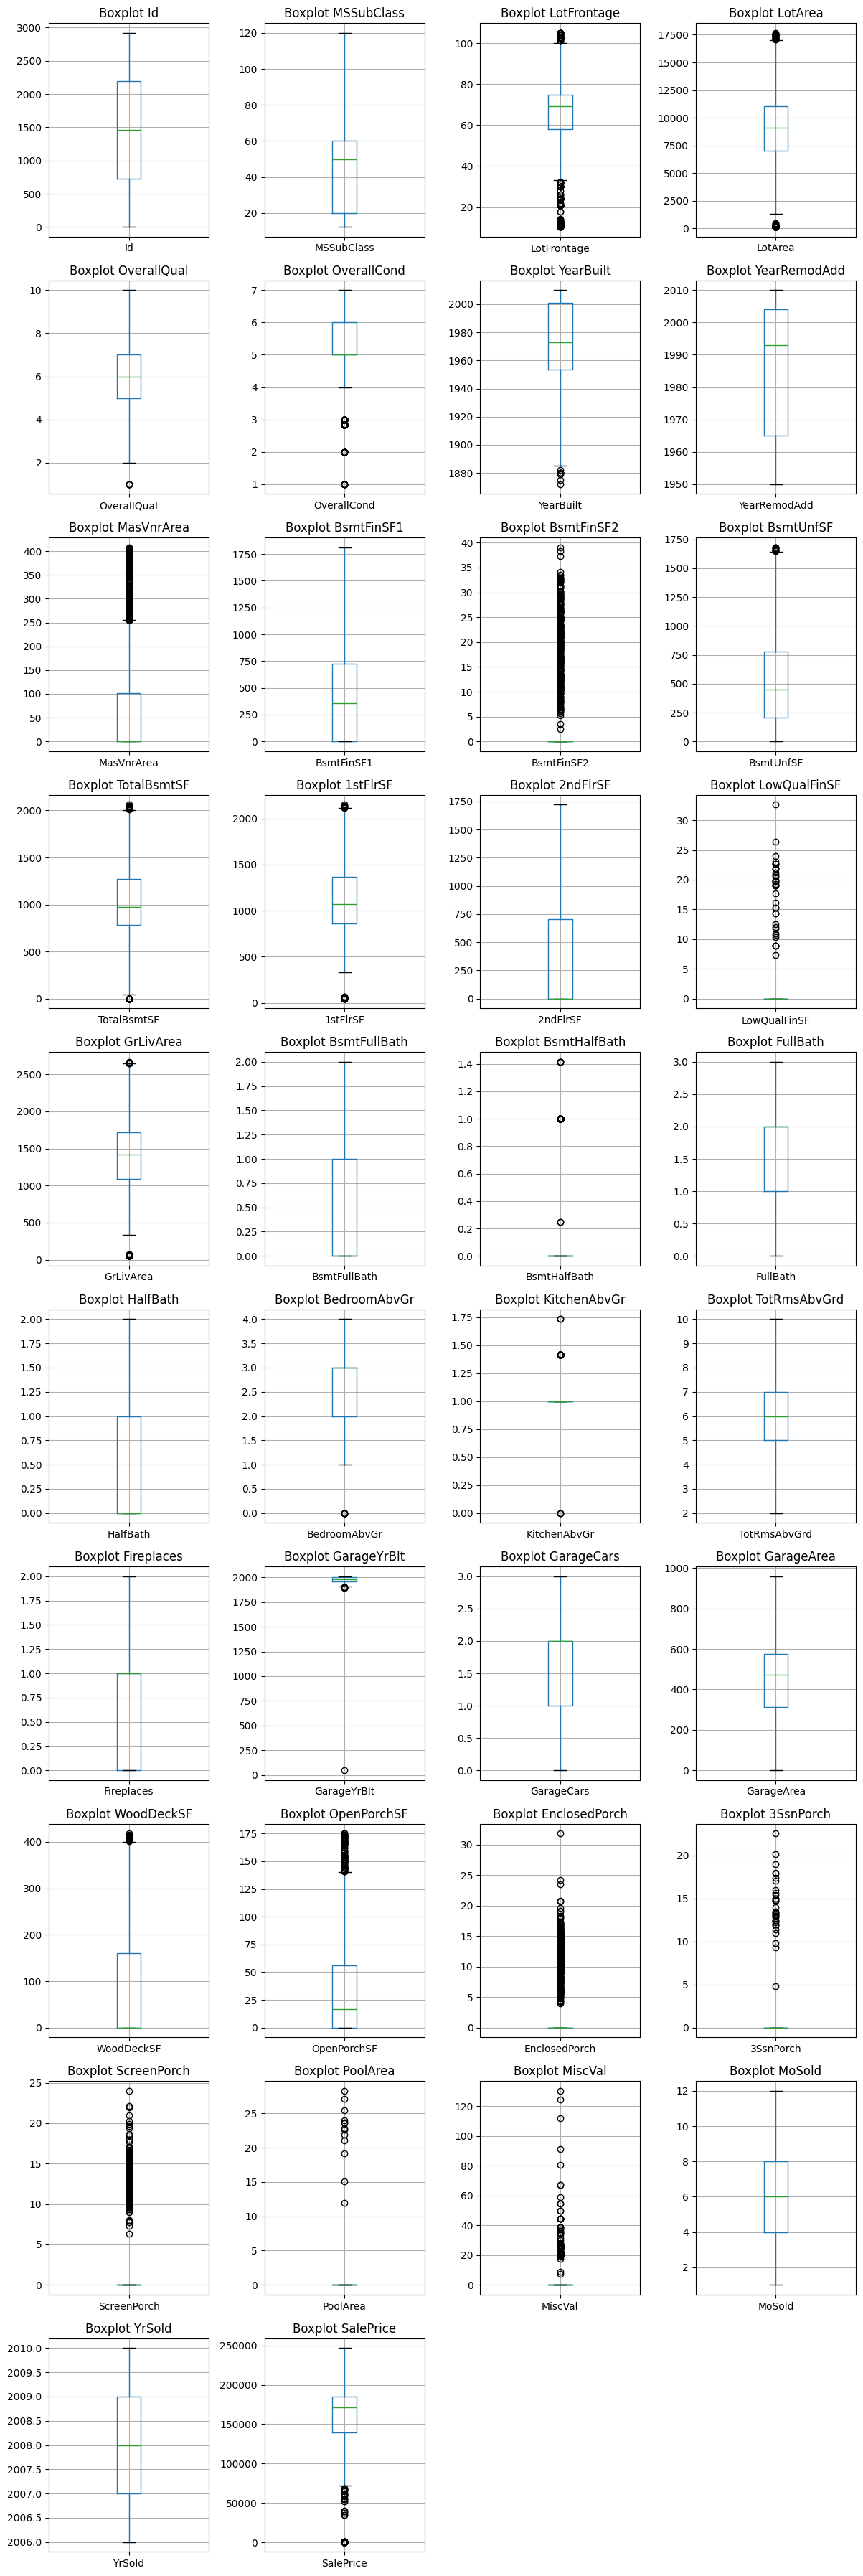

In [121]:
plot_boxplot(df_outlier_clean)

In [122]:
# Mendeteksi kolom dengan outlier dalam DataFrame
kolom_outlier = detect_outliers_columns(df_outlier_clean)

jumlah_kolom_outlier = len(kolom_outlier)

print("Kolom dengan outlier:")
print(kolom_outlier)
print("Jumlah kolom dengan outlier:", jumlah_kolom_outlier)

Kolom dengan outlier:
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
Jumlah kolom dengan outlier: 24


#### Transformasi BoxCox

In [123]:
def transform_outliers2(df):
    # Salin DataFrame untuk mencegah perubahan pada data asli
    df_copy = df.copy()
    
    # Mendapatkan kolom-kolom yang bertipe numerik
    numeric_columns = df_copy.select_dtypes(include='number').columns
    
    # Melakukan transformasi Box-Cox hanya pada kolom yang masih memiliki outlier
    for column in numeric_columns:
        # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)
        
        # Menghitung jarak interkuartil (IQR)
        iqr = q3 - q1
        
        # Menentukan batas atas dan batas bawah untuk outlier
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Memeriksa apakah kolom memiliki outlier
        has_outliers = ((df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)).any()
        
        if has_outliers:
            # Mengabaikan nilai 0 saat melakukan transformasi Box-Cox
            non_zero_values = df_copy[column][df_copy[column] != 0]
            
            # Menghitung lambda terbaik untuk transformasi Box-Cox
            _, maxlog = boxcox(non_zero_values)
            
            # Melakukan transformasi Box-Cox pada kolom
            df_copy[column] = np.where(df_copy[column] > 0, boxcox(df_copy[column], lmbda=maxlog), df_copy[column])
        
    return df_copy


In [124]:
# Memanggil fungsi untuk melakukan transformasi
df_outlier_clean2 = transform_outliers2(df_outlier_clean)

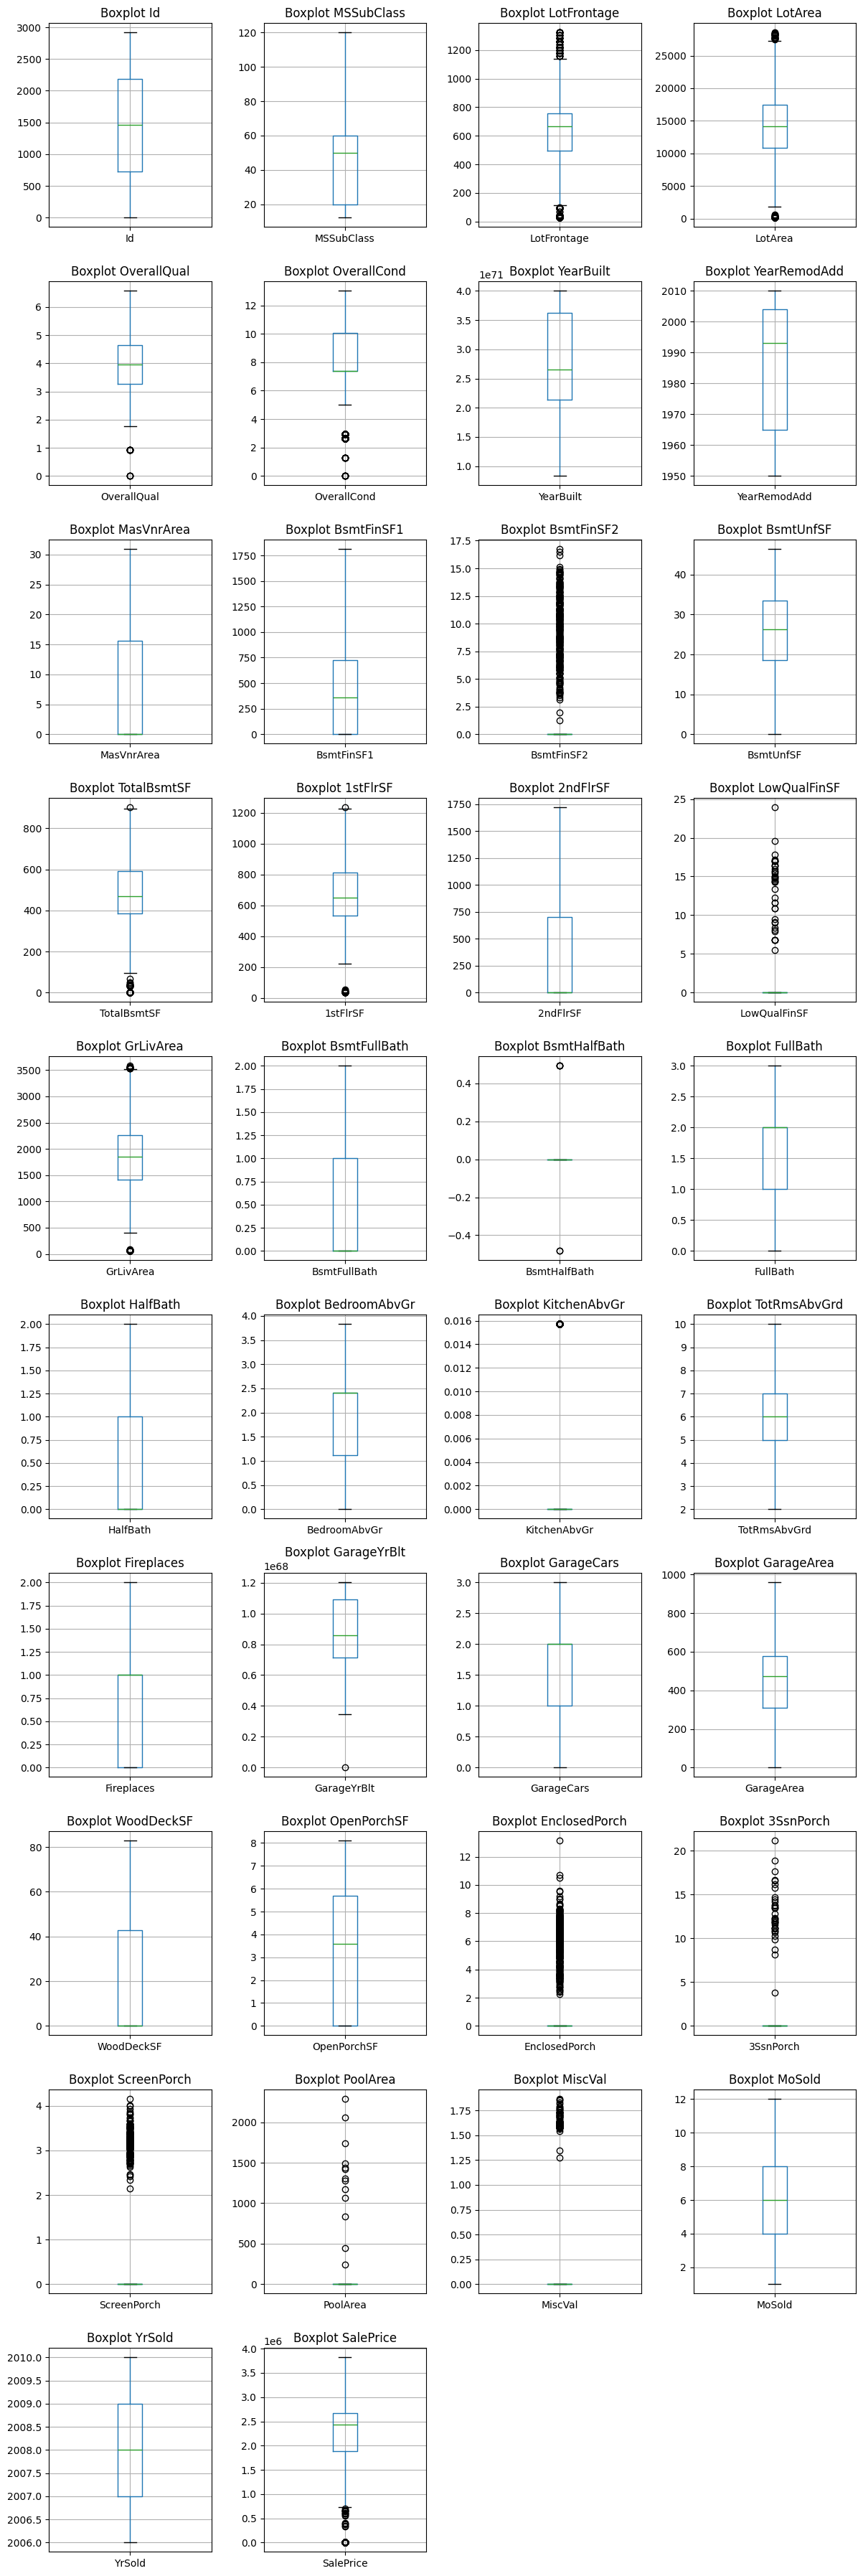

In [125]:
plot_boxplot(df_outlier_clean2)

In [127]:
# Mendeteksi kolom dengan outlier dalam DataFrame
kolom_outlier = detect_outliers_columns(df_outlier_clean2)

jumlah_kolom_outlier = len(kolom_outlier)

print("Kolom dengan outlier:")
print(kolom_outlier)
print("Jumlah kolom dengan outlier:", jumlah_kolom_outlier)

Kolom dengan outlier:
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'GarageYrBlt', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
Jumlah kolom dengan outlier: 18


Untuk menjaga agar distribusi data tidak semakin berbeda dengan distribusi aslinya, maka akan transformasi tidak dilakukan kembaali.

## **Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.**

### **Memeriksa imbalance data**

In [ ]:
def check_class_imbalance(df):
    for column in df.columns:
        # Hitung jumlah masing-masing kategori dalam kolom target
        class_counts = df[column].value_counts()

        # Tampilkan hasil
        print(f"\nJumlah masing-masing kategori dalam kolom {column}:")
        print(class_counts)

        # Hitung proporsi masing-masing kategori
        class_proportions = df[column].value_counts(normalize=True)

        # Tampilkan proporsi kategori
        print(f"\nProporsi masing-masing kategori dalam kolom {column}:")
        print(class_proportions)

        # Periksa keseimbangan data
        if len(class_counts) == 1:
            print(f"\nData dalam kolom {column} sangat tidak seimbang (imbalance).")
        elif len(class_counts) == 2:
            ratio = class_counts.iloc[0] / class_counts.iloc[1]
            if ratio > 3 or ratio < 0.3:
                print(f"\nData dalam kolom {column} tidak seimbang (imbalance).")
            else:
                print(f"\nData dalam kolom {column} seimbang (balanced).")
        else:
            print(f"\nData multiclass imbalance dalam kolom {column}.")


In [ ]:
# Contoh penggunaan fungsi
check_class_imbalance(df_5)


Jumlah masing-masing kategori dalam kolom Id:
Id
1       1
1940    1
1942    1
1943    1
1944    1
       ..
976     1
977     1
978     1
979     1
2919    1
Name: count, Length: 2919, dtype: int64

Proporsi masing-masing kategori dalam kolom Id:
Id
1       0.000343
1940    0.000343
1942    0.000343
1943    0.000343
1944    0.000343
          ...   
976     0.000343
977     0.000343
978     0.000343
979     0.000343
2919    0.000343
Name: proportion, Length: 2919, dtype: float64

Data multiclass imbalance dalam kolom Id.

Jumlah masing-masing kategori dalam kolom MSSubClass:
MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

Proporsi masing-masing kategori dalam kolom MSSubClass:
MSSubClass
20     0.369647
60     0.196985
50     0.098321
120    0.062350
30     0.047619
70     0.043851
160    0.043851
80     

In [ ]:
# def plot_histograms(df, target_column):
#     # Pisahkan dataset berdasarkan kelas target
#     target_classes = df[target_column].unique()
    
#     # Buat subplot untuk setiap fitur
#     fig, axes = plt.subplots(nrows=len(df.columns), ncols=len(target_classes), figsize=(15, 20))
    
#     # Iterasi melalui setiap fitur dan kelas target
#     for i, column in enumerate(df.columns):
#         for j, target_class in enumerate(target_classes):
#             # Filter data berdasarkan kelas target
#             data = df[df[target_column] == target_class][column]
            
#             # Buat histogram untuk setiap kelas target
#             axes[i, j].hist(data, bins=20, alpha=0.5, color='skyblue', edgecolor='black')
#             axes[i, j].set_title(f'{column} - {target_class}')
#             axes[i, j].set_xlabel(column)
#             axes[i, j].set_ylabel('Frequency')
    
#     plt.tight_layout()
#     plt.show()

# # Contoh penggunaan fungsi
# plot_histograms(df_5, 'SalePrice')

## **Melakukan feature encoding jika diperlukan**

# **Exploratory Data Analysis (EDA)**